# Configuration

In [1]:
# Parameters
ENABLE_COLAB = False

PROJECT_NAME = 'ML1010-Group-Project'
EXPERIMENT_NAME = 'ReviewText_Lemma_Bert (XGB)'
FILE_NAME = '01_ML1010_GP_XGB_Bert5'
LOAD_FROM_EXP = False

#Root Machine Learning Directory. Projects appear underneath
GOOGLE_DRIVE_MOUNT = '/content/gdrive' 
COLAB_ROOT_DIR = GOOGLE_DRIVE_MOUNT + '/MyDrive/Colab Notebooks'
COLAB_INIT_DIR = COLAB_ROOT_DIR + '/utility_files'

LOCAL_ROOT_DIR = '/home/magni//ML_Root/project_root'
LOCAL_INIT_DIR = LOCAL_ROOT_DIR + '/utility_files'

# Bootstrap Environment

In [2]:
#add in support for utility file directory and importing
import sys
import os

if ENABLE_COLAB:
  #Need access to drive
  from google.colab import drive
  drive.mount(GOOGLE_DRIVE_MOUNT, force_remount=True)
  
  #add in utility directory to syspath to import 
  INIT_DIR = COLAB_INIT_DIR
  sys.path.append(os.path.abspath(INIT_DIR))
  
  #Config environment variables
  ROOT_DIR = COLAB_ROOT_DIR
  
else:
  #add in utility directory to syspath to import
  INIT_DIR = LOCAL_INIT_DIR
  sys.path.append(os.path.abspath(INIT_DIR))
  
  #Config environment variables
  ROOT_DIR = LOCAL_ROOT_DIR

#Import Utility Support
from jarvis import Jarvis
jarvis = Jarvis(ROOT_DIR, PROJECT_NAME)

import mv_python_utils as mvutils

Wha...where am I?
I am awake now.

I have set your current working directory to /home/magni/ML_Root/project_root/ML1010-Group-Project
The current time is 00:02
Hello sir. You should really be sleeping.



# Setup Runtime Environment

In [3]:
if ENABLE_COLAB:
  #!pip install scipy -q
  #!pip install scikit-learn -q
  #!pip install pycaret -q
  #!pip install matplotlib -q
  #!pip install joblib -q
  #!pip install pandasql -q
  !pip install umap_learn -q
  !pip install sentence_transformers -q
  !pip install spacytextblob -q
  !pip install flair -q
  display('Google Colab enabled')
else:
  display('Google Colab not enabled')

#Common imports
import json
import pandas as pd
import numpy as np
import matplotlib
import re
import nltk
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split as tts
#from yellowbrick.classifier import ConfusionMatrix
#from sklearn.linear_model import LogisticRegression
from yellowbrick.target import ClassBalance
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

nltk.download('stopwords')
%matplotlib inline

'Google Colab not enabled'

[nltk_data] Downloading package stopwords to /home/magni/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
import cw_df_metric_utils as cwutils
import importlib
import DataPackage as dp
import DataPackageSupport as dps
import DataExperiment
import DataExperimentSupport

2022-01-15 00:02:13.982341: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-01-15 00:02:13.982375: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [5]:
axis_labels=[1,2,3,4,5]
#axis_labels=[0,1]

# Load Data

In [6]:
from xgboost import XGBClassifier

classifier = XGBClassifier(eval_metric='mlogloss')
#classifier = SVC(gamma=0.001, verbose=True)
#classifier = RandomForestClassifier()

In [7]:
ENCODING_COLUMN='reviewText_lemma_bert'
UNIQUE_COLUMN='uuid'
TARGET_COLUMN='overall'

if LOAD_FROM_EXP:
    #start from saved state
    myExp = jarvis.loadExperiment(FILE_NAME)
    myExp.display()

else:
    #start from source file and regenerate
    testDf = pd.read_pickle(jarvis.DATA_DIR_WORK + "/01_NL_ReviewText_All(new).pkl.gz")
    testDf.info()
    
    testDfBert = cwutils.getBertEncodeFrame(df=testDf,
                                            bertColumn=ENCODING_COLUMN,
                                            uniqueColumn=UNIQUE_COLUMN,
                                            otherColumns=[TARGET_COLUMN]
                                            )

    myExp = DataExperiment.DataExperiment(projectName=PROJECT_NAME,
                                          experimentName=EXPERIMENT_NAME,
                                          origData=testDfBert,
                                          uniqueColumn=UNIQUE_COLUMN,
                                          targetColumn=TARGET_COLUMN,
                                          classifier=classifier)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63413 entries, 0 to 63412
Data columns (total 51 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   uuid                                    63413 non-null  object 
 1   reviewText                              63413 non-null  object 
 2   overall                                 63413 non-null  float64
 3   reviewText_lemma                        63413 non-null  object 
 4   reviewText_nouns                        63413 non-null  object 
 5   reviewText_adjectives                   63413 non-null  object 
 6   reviewText_verbs                        63413 non-null  object 
 7   reviewText_nav                          63413 non-null  object 
 8   reviewText_lemma_tb_pol                 63310 non-null  float64
 9   reviewText_lemma_tb_subj                63310 non-null  float64
 10  reviewText_lemma_tb_tokens              63310 non-null  fl

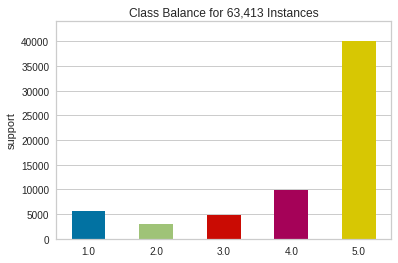

Undersampling data to match min class: 2.0 of size: 2946


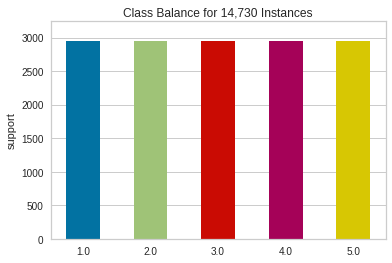

Completed train/test split (test_size = 0.2):
---> Original data size: 14730
---> Training data size: 11784
---> Testing data size: 2946
---> Stratified on column: overall


In [8]:
myExp.processDataPackage()

In [9]:
myExp.display()

DataExperiment summary:
---> projectName: ML1010-Group-Project
---> experimentName: ReviewText_Lemma_Bert (XGB)
---> isDataPackageLoaded: True
---> isBaseModelLoaded: False
---> isBaseModelPredicted: False
---> isBaseModelLearningCurveCreated: False
---> isFinalModelLoaded: False
---> isFinalModelPredicted: False
---> isFinalModelLearningCurveCreated: False
---> isClassifierLoaded: True
XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, eval_metric='mlogloss', gamma=None,
              gpu_id=None, importance_type=None, interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_wei

In [10]:
myExp.createBaseModel()

/home/magni/python_env/ML1010_env2/lib64/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [11]:
myExp.predictBaseModel()

Base Model Stats:
Accuracy: 0.43
Precision: 0.43
Recalll: 0.43
F1 Score: 0.43
Cohen kappa:: 0.29


  0%|          | 0/101 [00:00<?, ?it/s]

Feature Importance Summary:
---> Original feature count: 768
---> Returned feature count: 38
---> Removed feature count: 730
---> Return items above (including): 0.002


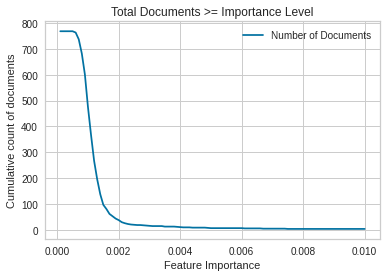

In [12]:
impFeatures = myExp.analyzeBaseModelFeatureImportance(returnAbove=0.002)

In [13]:
myExp.createFinalModel(featureImportanceThreshold=0.002)

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

/home/magni/python_env/ML1010_env2/lib64/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [14]:
myExp.display()

DataExperiment summary:
---> projectName: ML1010-Group-Project
---> experimentName: ReviewText_Lemma_Bert (XGB)
---> isDataPackageLoaded: True
---> isBaseModelLoaded: True
---> isBaseModelPredicted: True
---> isBaseModelLearningCurveCreated: False
---> isFinalModelLoaded: True
---> isFinalModelPredicted: False
---> isFinalModelLearningCurveCreated: False
---> isClassifierLoaded: True
XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, eval_metric='mlogloss', gamma=None,
              gpu_id=None, importance_type=None, interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight

In [15]:
myExp.predictFinalModel()
myExp.display()

Final Model Stats:
Accuracy: 0.41
Precision: 0.4
Recalll: 0.41
F1 Score: 0.41
Cohen kappa:: 0.26
DataExperiment summary:
---> projectName: ML1010-Group-Project
---> experimentName: ReviewText_Lemma_Bert (XGB)
---> isDataPackageLoaded: True
---> isBaseModelLoaded: True
---> isBaseModelPredicted: True
---> isBaseModelLearningCurveCreated: False
---> isFinalModelLoaded: True
---> isFinalModelPredicted: True
---> isFinalModelLearningCurveCreated: False
---> isClassifierLoaded: True
XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, eval_metric='mlogloss', gamma=None,
              gpu_id=None, importance_type=None, interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              pr

In [16]:
myExp.createBaseModelLearningCurve()

[learning_curve] Training set sizes: [ 942 1885 4713 9427]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/magni/python_env/ML1010_env2/lib64/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END ..................., score=(train=0.969, test=0.373) total time=   5.4s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.4s remaining:    0.0s
/home/magni/python_env/ML1010_env2/lib64/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END ..................., score=(train=0.963, test=0.392) total time=  11.8s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   17.2s remaining:    0.0s
/home/magni/python_env/ML1010_env2/lib64/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END ..................., score=(train=0.950, test=0.418) total time=  30.0s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   47.2s remaining:    0.0s
/home/magni/python_env/ML1010_env2/lib64/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END ..................., score=(train=0.944, test=0.415) total time= 1.0min


/home/magni/python_env/ML1010_env2/lib64/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END ..................., score=(train=0.968, test=0.379) total time=   4.9s


/home/magni/python_env/ML1010_env2/lib64/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END ..................., score=(train=0.966, test=0.393) total time=  11.0s


/home/magni/python_env/ML1010_env2/lib64/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END ..................., score=(train=0.952, test=0.402) total time=  29.9s


/home/magni/python_env/ML1010_env2/lib64/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END ..................., score=(train=0.946, test=0.401) total time=  56.0s


/home/magni/python_env/ML1010_env2/lib64/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END ..................., score=(train=0.976, test=0.368) total time=   4.5s


/home/magni/python_env/ML1010_env2/lib64/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END ..................., score=(train=0.966, test=0.379) total time=  11.0s


/home/magni/python_env/ML1010_env2/lib64/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END ..................., score=(train=0.951, test=0.396) total time=  29.6s


/home/magni/python_env/ML1010_env2/lib64/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END ..................., score=(train=0.948, test=0.406) total time=  56.3s


/home/magni/python_env/ML1010_env2/lib64/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END ..................., score=(train=0.969, test=0.371) total time=   4.6s


/home/magni/python_env/ML1010_env2/lib64/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END ..................., score=(train=0.960, test=0.382) total time=  10.9s


/home/magni/python_env/ML1010_env2/lib64/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END ..................., score=(train=0.950, test=0.414) total time=  30.0s


/home/magni/python_env/ML1010_env2/lib64/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END ..................., score=(train=0.947, test=0.430) total time=  57.8s


/home/magni/python_env/ML1010_env2/lib64/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END ..................., score=(train=0.966, test=0.382) total time=   5.1s


/home/magni/python_env/ML1010_env2/lib64/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END ..................., score=(train=0.961, test=0.398) total time=  11.6s


/home/magni/python_env/ML1010_env2/lib64/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END ..................., score=(train=0.949, test=0.411) total time=  33.2s


/home/magni/python_env/ML1010_env2/lib64/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END ..................., score=(train=0.945, test=0.416) total time=  56.8s


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  8.7min finished


In [17]:
myExp.createFinalModelLearningCurve()

[learning_curve] Training set sizes: [ 942 1885 4713 9427]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/magni/python_env/ML1010_env2/lib64/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END ..................., score=(train=0.969, test=0.367) total time=   0.9s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s
/home/magni/python_env/ML1010_env2/lib64/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END ..................., score=(train=0.963, test=0.371) total time=   1.1s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.0s remaining:    0.0s
/home/magni/python_env/ML1010_env2/lib64/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END ..................., score=(train=0.950, test=0.400) total time=   2.4s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.4s remaining:    0.0s
/home/magni/python_env/ML1010_env2/lib64/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END ..................., score=(train=0.938, test=0.413) total time=   4.4s


/home/magni/python_env/ML1010_env2/lib64/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END ..................., score=(train=0.968, test=0.372) total time=   0.9s


/home/magni/python_env/ML1010_env2/lib64/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END ..................., score=(train=0.966, test=0.384) total time=   1.1s


/home/magni/python_env/ML1010_env2/lib64/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END ..................., score=(train=0.952, test=0.394) total time=   2.4s


/home/magni/python_env/ML1010_env2/lib64/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END ..................., score=(train=0.940, test=0.413) total time=   4.3s


/home/magni/python_env/ML1010_env2/lib64/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END ..................., score=(train=0.976, test=0.373) total time=   0.7s


/home/magni/python_env/ML1010_env2/lib64/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END ..................., score=(train=0.966, test=0.384) total time=   1.2s


/home/magni/python_env/ML1010_env2/lib64/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END ..................., score=(train=0.951, test=0.380) total time=   2.4s


/home/magni/python_env/ML1010_env2/lib64/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END ..................., score=(train=0.939, test=0.395) total time=   4.4s


/home/magni/python_env/ML1010_env2/lib64/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END ..................., score=(train=0.969, test=0.358) total time=   0.7s


/home/magni/python_env/ML1010_env2/lib64/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END ..................., score=(train=0.960, test=0.384) total time=   1.2s


/home/magni/python_env/ML1010_env2/lib64/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END ..................., score=(train=0.950, test=0.400) total time=   2.5s


/home/magni/python_env/ML1010_env2/lib64/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END ..................., score=(train=0.940, test=0.433) total time=   5.5s


/home/magni/python_env/ML1010_env2/lib64/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END ..................., score=(train=0.966, test=0.376) total time=   0.7s


/home/magni/python_env/ML1010_env2/lib64/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END ..................., score=(train=0.961, test=0.370) total time=   1.7s


/home/magni/python_env/ML1010_env2/lib64/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END ..................., score=(train=0.949, test=0.398) total time=   3.8s


/home/magni/python_env/ML1010_env2/lib64/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[CV] END ..................., score=(train=0.937, test=0.398) total time=   4.6s


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   47.2s finished


  0%|          | 0/251 [00:00<?, ?it/s]

  0%|          | 0/22 [00:00<?, ?it/s]

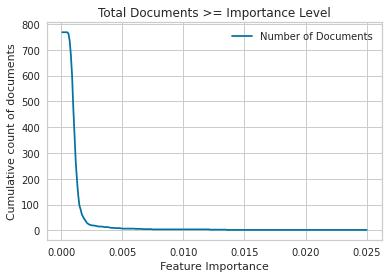

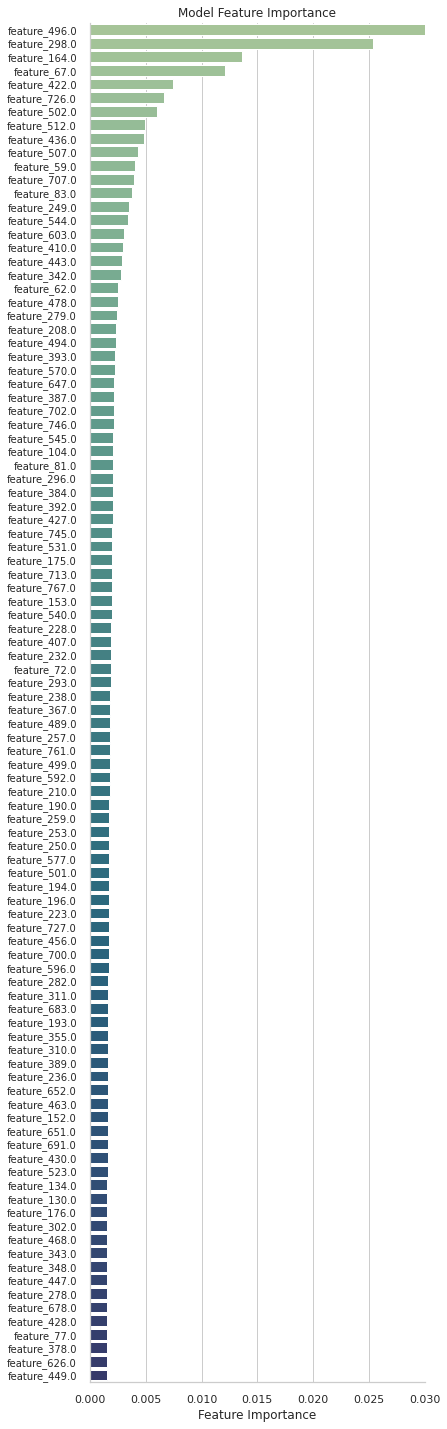

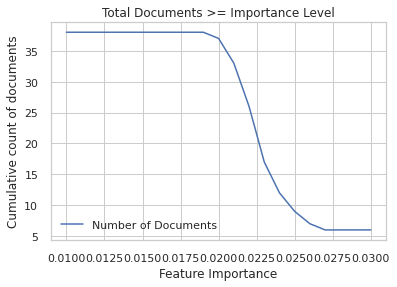

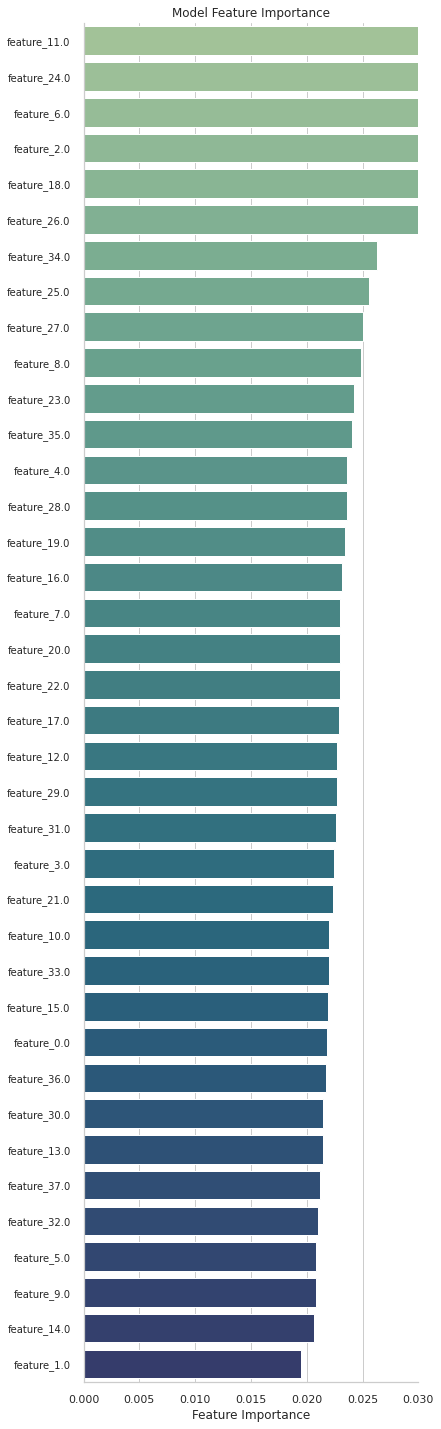

In [18]:
myExp.showBaseModelFeatureImportance(upperValue=0.025)
myExp.showFinalModelFeatureImportance(startValue=0.01,
                                      increment=0.001,
                                      upperValue=0.03)

#  Model Summary

In [19]:
myExp.display()

DataExperiment summary:
---> projectName: ML1010-Group-Project
---> experimentName: ReviewText_Lemma_Bert (XGB)
---> isDataPackageLoaded: True
---> isBaseModelLoaded: True
---> isBaseModelPredicted: True
---> isBaseModelLearningCurveCreated: True
---> isFinalModelLoaded: True
---> isFinalModelPredicted: True
---> isFinalModelLearningCurveCreated: True
---> isClassifierLoaded: True
XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, eval_metric='mlogloss', gamma=None,
              gpu_id=None, importance_type=None, interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=No

Base Model Stats:
Accuracy: 0.43
Precision: 0.43
Recalll: 0.43
F1 Score: 0.43
Cohen kappa:: 0.29
              precision    recall  f1-score   support

         1.0       0.51      0.53      0.52       589
         2.0       0.36      0.36      0.36       589
         3.0       0.32      0.28      0.30       590
         4.0       0.38      0.41      0.39       589
         5.0       0.57      0.57      0.57       589

    accuracy                           0.43      2946
   macro avg       0.43      0.43      0.43      2946
weighted avg       0.43      0.43      0.43      2946



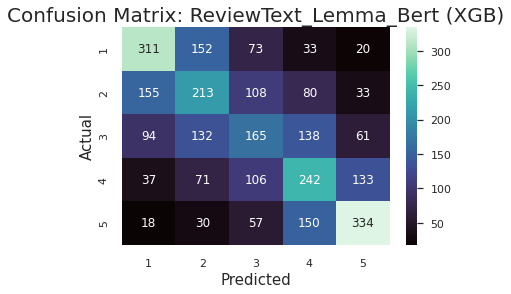

<Figure size 1440x576 with 0 Axes>

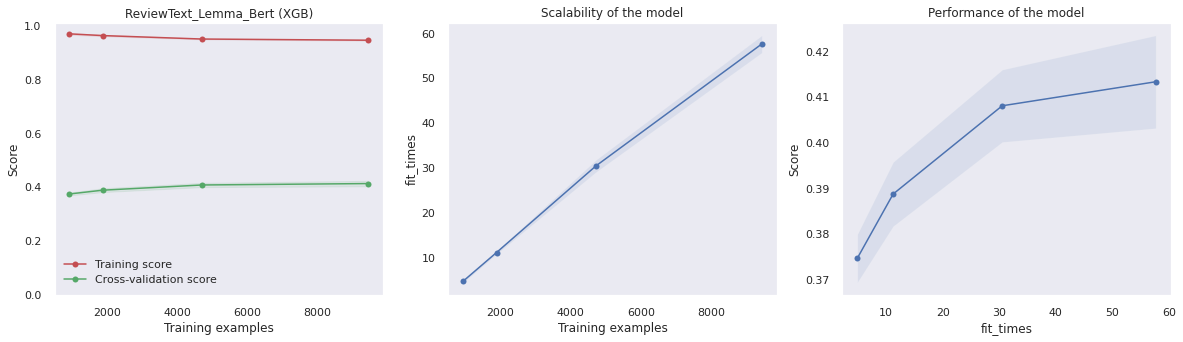

Base model ROCAUC not calculated. Starting now


/home/magni/python_env/ML1010_env2/lib64/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


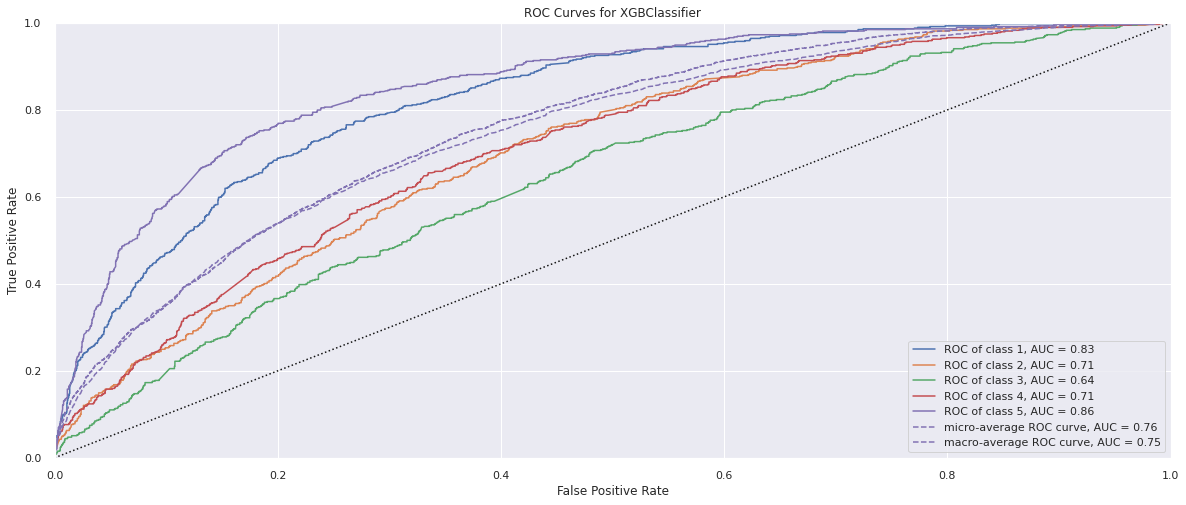

In [20]:
myExp.showBaseModelReport(axis_labels)

Final Model Stats:
Accuracy: 0.41
Precision: 0.4
Recalll: 0.41
F1 Score: 0.41
Cohen kappa:: 0.26
              precision    recall  f1-score   support

         1.0       0.46      0.50      0.48       589
         2.0       0.33      0.33      0.33       589
         3.0       0.30      0.26      0.28       590
         4.0       0.37      0.35      0.36       589
         5.0       0.55      0.61      0.58       589

    accuracy                           0.41      2946
   macro avg       0.40      0.41      0.41      2946
weighted avg       0.40      0.41      0.41      2946



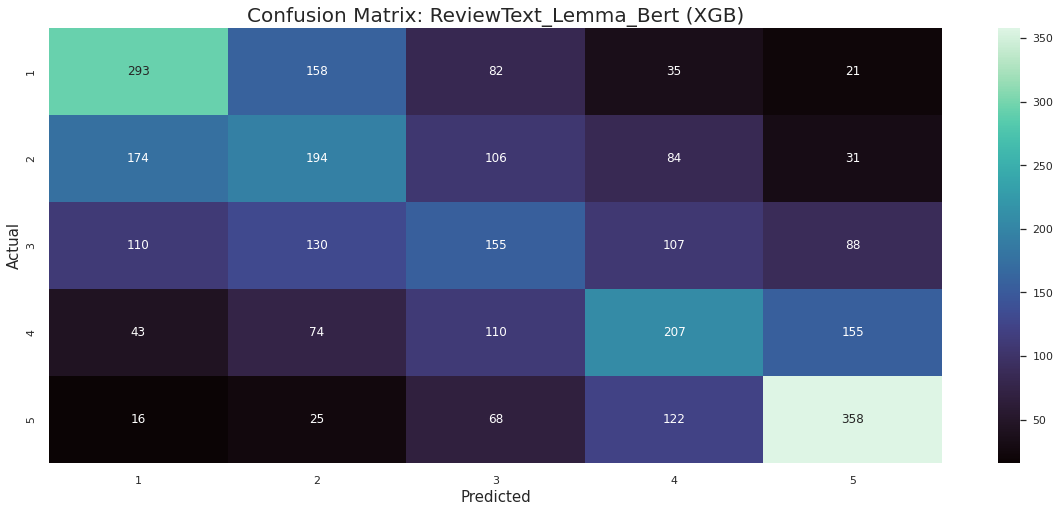

<Figure size 1440x576 with 0 Axes>

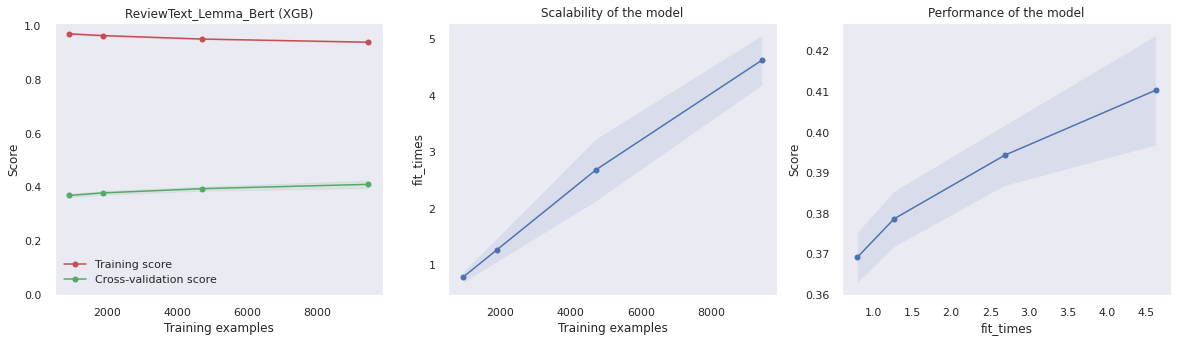

Final model ROCAUC not calculated. Starting now


/home/magni/python_env/ML1010_env2/lib64/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


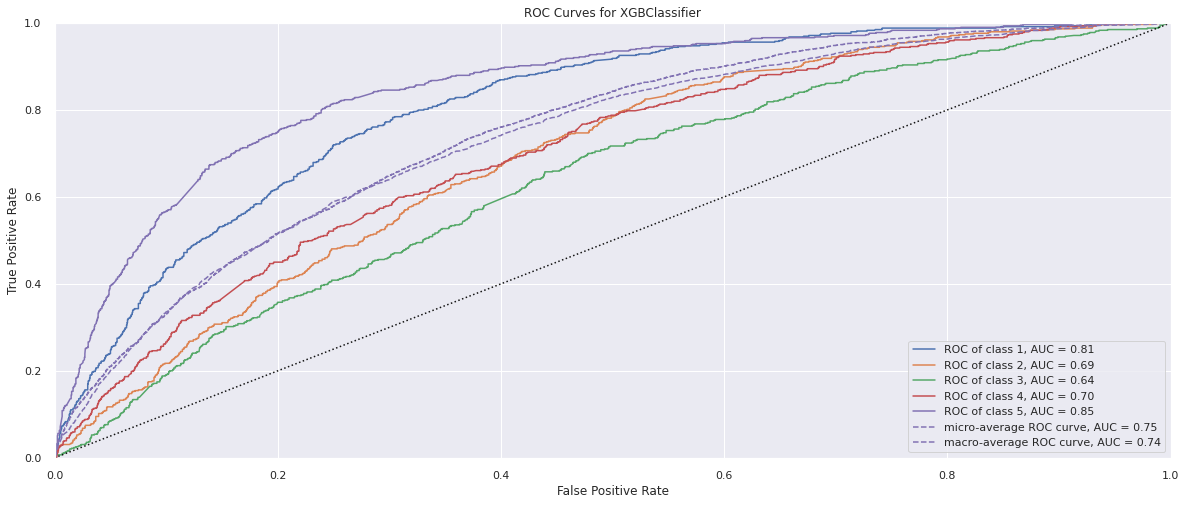

In [21]:
myExp.showFinalModelReport(axis_labels)

In [22]:
myExp.display()

DataExperiment summary:
---> projectName: ML1010-Group-Project
---> experimentName: ReviewText_Lemma_Bert (XGB)
---> isDataPackageLoaded: True
---> isBaseModelLoaded: True
---> isBaseModelPredicted: True
---> isBaseModelLearningCurveCreated: True
---> isFinalModelLoaded: True
---> isFinalModelPredicted: True
---> isFinalModelLearningCurveCreated: True
---> isClassifierLoaded: True
XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, eval_metric='mlogloss', gamma=None,
              gpu_id=None, importance_type=None, interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=No

#  Save Experiment

In [23]:
jarvis.saveExperiment(myExp, FILE_NAME)

#  Scratchpad

In [24]:
lst = myExp.getBaseFeatures()
print (len(lst))

768
